In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
data = pd.read_excel('childcareprices.xlsx')
data.head(10)

,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
0,Alabama,AL,Autauga County,1001,2008,5.42,4.41,6.32,4.6,3.5,...,83.45,3.0,81.40,1.0,97.4,1.0,97.4,3.0,95.00,1.0
1,Alabama,AL,Autauga County,1001,2009,5.93,5.72,6.11,4.8,4.6,...,87.39,3.0,85.68,1.0,102.0,1.0,102.0,3.0,100.00,1.0
2,Alabama,AL,Autauga County,1001,2010,6.21,5.57,6.78,5.1,4.6,...,91.33,3.0,89.96,1.0,106.6,1.0,106.6,3.0,105.00,1.0
3,Alabama,AL,Autauga County,1001,2011,7.55,8.13,7.03,6.2,6.3,...,95.28,3.0,94.25,1.0,111.2,1.0,111.2,3.0,110.00,1.0
4,Alabama,AL,Autauga County,1001,2012,8.60,8.88,8.29,6.7,6.4,...,99.22,3.0,98.53,1.0,115.8,1.0,115.8,3.0,115.00,1.0
5,Alabama,AL,Autauga County,1001,2013,9.39,10.31,8.56,7.3,7.6,...,103.16,3.0,102.82,1.0,120.4,1.0,120.4,3.0,120.00,1.0
6,Alabama,AL,Autauga County,1001,2014,8.50,9.18,7.95,6.8,6.8,...,107.10,1.0,107.10,1.0,125.0,1.0,125.0,1.0,125.00,1.0
7,Alabama,AL,Autauga County,1001,2015,7.64,8.45,6.91,5.9,6.1,...,107.10,3.0,106.81,1.0,125.0,1.0,125.0,3.0,124.67,1.0
8,Alabama,AL,Autauga County,1001,2016,5.59,6.27,4.99,4.4,4.6,...,107.10,3.0,106.53,1.0,125.0,1.0,125.0,3.0,124.33,1.0
9,Alabama,AL,Autauga County,1001,2017,5.21,5.84,4.64,4.6,4.9,...,107.10,3.0,106.24,1.0,125.0,1.0,125.0,3.0,124.00,1.0


In [4]:
data.columns

Index(['State_Name', 'State_Abbreviation', 'County_Name', 'County_FIPS_Code',
       'StudyYear', 'UNR_16', 'FUNR_16', 'MUNR_16', 'UNR_20to64',
       'FUNR_20to64',
       ...
       'MFCCToddler', 'MFCCToddler_flag', 'MFCCPreschool',
       'MFCCPreschool_flag', '_75FCCInfant', '_75FCCInfant_flag',
       '_75FCCToddler', '_75FCCToddler_flag', '_75FCCPreschool',
       '_75FCCPreschool_flag'],
      dtype='object', length=227)

In [7]:
data['StudyYear'].agg(['min', 'max']), data['State_Name'].nunique()

(min    2008
 max    2018
 Name: StudyYear, dtype: int64,
 51)

Data ranges from 2008-2018

In [18]:
# Get whatever columns are not redudant or have meaningful information to explore
columns = [
    'State_Name', 'County_Name', 'StudyYear',
    'MFCCInfant', 'MFCCPreschool', 'MFCCToddler',
    '_75FCCInfant', '_75FCCPreschool', '_75FCCToddler',
    'UNR_20to64', 'FUNR_20to64', 'MUNR_20to64'
]

In [20]:
# drop anything that doesn't have data
cleaned = data [columns]
cleaned = cleaned.dropna(subset=['MFCCInfant', 'MFCCPreschool', 'MFCCToddler'])

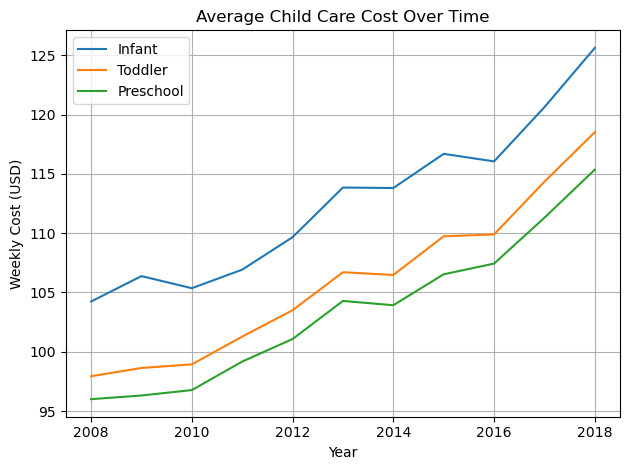

In [118]:
costs_by_year = cleaned.groupby('StudyYear')[['MFCCInfant', 'MFCCToddler', 'MFCCPreschool']].mean().reset_index()

sns.lineplot(data=costs_by_year, x='StudyYear', y='MFCCInfant', label='Infant')
sns.lineplot(data=costs_by_year, x='StudyYear', y='MFCCToddler', label='Toddler')
sns.lineplot(data=costs_by_year, x='StudyYear', y='MFCCPreschool', label='Preschool')
plt.title('Average Child Care Cost Over Time')
plt.ylabel('Weekly Cost (USD)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

Costs are increasing across the board for all types of child care.

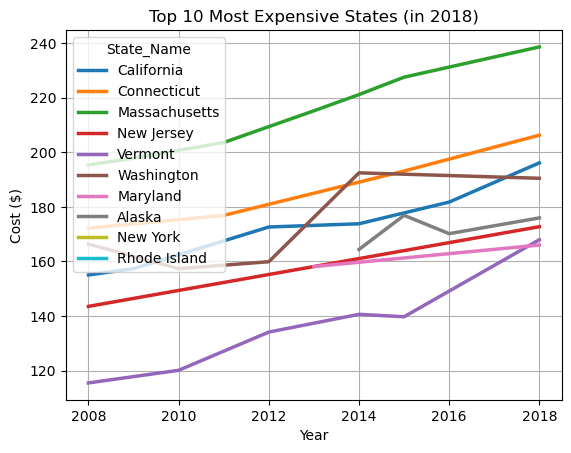

In [122]:
top_infant_states_last_year = cleaned[cleaned['StudyYear'] == 2018].groupby('State_Name')['MFCCInfant'].mean().sort_values(ascending=False).head(10).index
top_infant_states_last_year

# Calculate yearly averages for those states
top_states = cleaned[cleaned['State_Name'].isin(top_infant_states_last_year)]
top_states_average = (
    top_states.groupby(['StudyYear', 'State_Name'])[['MFCCInfant']]
    .mean()
    .reset_index()
)
sns.lineplot(data=top_states_average, x='StudyYear', y='MFCCInfant', hue='State_Name', linewidth=2.5)
plt.title('Top 10 Most Expensive States (in 2018)')
plt.ylabel('Cost ($)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

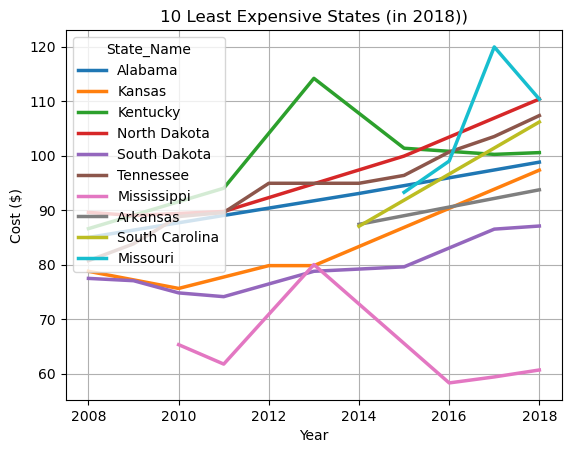

In [128]:
bottom_infant_states_last_year = cleaned[cleaned['StudyYear'] == 2018].groupby('State_Name')['MFCCInfant'].mean().sort_values(ascending=True).head(10).index
bottom_infant_states_last_year

bottom_states = cleaned[cleaned['State_Name'].isin(bottom_infant_states_last_year)]
bottom_states_average = (
    bottom_states.groupby(['StudyYear', 'State_Name'])[['MFCCInfant']]
    .mean()
    .reset_index()
)
sns.lineplot(data=bottom_states_average, x='StudyYear', y='MFCCInfant', hue='State_Name', linewidth=2.5)
plt.title('10 Least Expensive States (in 2018))')
plt.ylabel('Cost ($)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


Why did Missouri suddenly spike in cost over that short period of time?  Why is Mississippi consistently lower, even lower than it was in previous years?